In [1]:
import pandas as pd
import numpy as np

In [2]:
from autoscraper import AutoScraper
import pandas as pd
import numpy as np
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Amazon.csv')


C:\Users\91880\AppData\Local\Temp\ipykernel_10128\3447688757.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Amazon.csv')


In [4]:
data

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Ser

In [12]:
data = data["reviews.text"]
data

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I've had my Fire HD 8 two weeks now and I love...
4        I bought this for my grand daughter when she c...
                               ...                        
34655    This is not appreciably faster than any other ...
34656    Amazon should include this charger with the Ki...
34657    Love my Kindle Fire but I am really disappoint...
34658    I was surprised to find it did not come with a...
34659    to spite the fact that i have nothing but good...
Name: reviews.text, Length: 34660, dtype: object

In [17]:
data.columns = ['Review']

In [18]:
data


0       This product so far has not disappointed. My c...
1       great for beginner or experienced person. Boug...
2       Inexpensive tablet for him to use and learn on...
3       I've had my Fire HD 8 two weeks now and I love...
4       I bought this for my grand daughter when she c...
                              ...                        
2995    I would recommend the Fire Tablet to anyone. I...
2996    Bought this mostly as a backup.and to read a f...
2997    This is a very good tablet. The only con is yo...
2998    I hate amazon app store. Nothing good in there...
2999    This is my second Fire. Wanted a larger size t...
Name: reviews.text, Length: 3000, dtype: object

In [29]:
data = data.head(3000)

In [30]:
txt = ' '.join(data)

In [31]:
txt

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. great for beginner or experienced person. Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already... I\'ve had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands. I bought this for my grand daughter when she comes o

In [32]:
rxt = txt

In [33]:
rxt

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. great for beginner or experienced person. Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already... I\'ve had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands. I bought this for my grand daughter when she comes o

In [21]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re

In [22]:
sent = sent_tokenize(txt)

sent

['This product so far has not disappointed.',
 'My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person.',
 'Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI.',
 'He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.',
 'I bought this fo

In [25]:
len(sent)

7490

In [37]:
corpus = []

for i in range(len(sent)):
    txt = re.sub('[^a-zA-Z]', ' ',sent[i])
    txt = txt.lower()
    corpus.append(txt)

In [38]:
txt

'perfect for what i wanted it for '

In [39]:
rxt

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. great for beginner or experienced person. Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already... I\'ve had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands. I bought this for my grand daughter when she comes o

In [40]:
corpus

['this product so far has not disappointed ',
 'my children love to use it and i like the ability to monitor control what content they see with ease ',
 'great for beginner or experienced person ',
 'bought as a gift and she loves it inexpensive tablet for him to use and learn on  step up from the nabi ',
 'he was thrilled with it  learn how to skype on it already   ',
 'i ve had my fire hd   two weeks now and i love it ',
 'this tablet is a great value we are prime members and that is where this tablet shines ',
 'i love being able to easily access all of the prime content as well as movies you can download and watch laterthis has a          screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing      base model ',
 'the build on this fire is insanely awesome running at only    mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands ',
 'i bought this fo

In [42]:
stemmer = PorterStemmer()

stemmer.stem('tablet')

'tablet'

In [43]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(stemmer.stem(i))

product
far
disappoint
children
love
use
like
abil
monitor
control
content
see
eas
great
beginn
experienc
person
bought
gift
love
inexpens
tablet
use
learn
step
nabi
thrill
learn
skype
alreadi
fire
hd
two
week
love
tablet
great
valu
prime
member
tablet
shine
love
abl
easili
access
prime
content
well
movi
download
watch
laterthi
screen
realli
nice
look
nice
crisp
bright
infact
brighter
ipad
pro
cost
base
model
build
fire
insan
awesom
run
mm
thick
smooth
glossi
feel
back
realli
amaz
hold
like
futurist
tab
ur
hand
bought
grand
daughter
come
visit
set
user
enter
age
name
amazon
make
sure
access
site
content
appropri
age
simpl
love
capabl
also
bought
instal
gig
sd
card
give
littl
tablet
plenti
storag
price
think
tablet
best
one
spend
hundr
dollar
addit
speed
capac
come
basic
tablet
everyth
peopl
ever
need
fraction
cost
amazon
fire
inch
tablet
perfect
size
purchas
husband
bigger
screen
phone
gotten
one
year
ago
knew
would
good
purchas
great
e
read
go
nice
light
weight
price
point
given
defin

In [45]:
lemma = WordNetLemmatizer()

lemma.lemmatize('history')

'history'

In [46]:
for i in corpus:
    words = word_tokenize(i)
    for i in words:
        if i not in stopwords.words('english'):
            print(lemma.lemmatize(i)) 

product
far
disappointed
child
love
use
like
ability
monitor
control
content
see
ease
great
beginner
experienced
person
bought
gift
love
inexpensive
tablet
use
learn
step
nabi
thrilled
learn
skype
already
fire
hd
two
week
love
tablet
great
value
prime
member
tablet
shine
love
able
easily
access
prime
content
well
movie
download
watch
laterthis
screen
really
nice
look
nice
crisp
bright
infact
brighter
ipad
pro
costing
base
model
build
fire
insanely
awesome
running
mm
thick
smooth
glossy
feel
back
really
amazing
hold
like
futuristic
tab
ur
hand
bought
grand
daughter
come
visit
set
user
entered
age
name
amazon
make
sure
access
site
content
appropriate
age
simple
love
capability
also
bought
installed
gig
sd
card
give
little
tablet
plenty
storage
price
think
tablet
best
one
spend
hundred
dollar
additional
speed
capacity
come
basic
tablet
everything
people
ever
need
fraction
cost
amazon
fire
inch
tablet
perfect
size
purchased
husband
bigger
screen
phone
gotten
one
year
ago
knew
would
good
pu

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [48]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
cv.get_feature_names()

C:\Users\91880\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abilities',
 'ability',
 'abit',
 'able',
 'abount',
 'about',
 'above',
 'absolute',
 'absolutely',
 'abuse',
 'acc',
 'accent',
 'accept',
 'accepted',
 'acces',
 'access',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accidental',
 'accidentally',
 'accidently',
 'accommodate',
 'accomodate',
 'accomplish',
 'accomplished',
 'accordingly',
 'account',
 'accounts',
 'accurate',
 'acer',
 'acess',
 'achieve',
 'achievements',
 'acquainted',
 'acrobat',
 'across',
 'acting',
 'action',
 'actions',
 'activate',
 'activated',
 'active',
 'activities',
 'activity',
 'acts',
 'actual',
 'actually',
 'ad',
 'adaptive',
 'add',
 'added',
 'addict',
 'addicted',
 'adding',
 'addition',
 'additional',
 'address',
 'adds',
 'adequate',
 'adjust',
 'adjusted',
 'adjusting',
 'adjustment',
 'adjusts',
 'admit',
 'admittedly',
 'adopted',
 'adore',
 'ads',
 'adult',
 'adults',
 'adust',
 'advance',
 'advanced',
 'advantage',
 'advertise',
 'advertised',
 'advertiseme

In [53]:
cv.vocabulary_

{'this': 3872,
 'product': 2916,
 'so': 3517,
 'far': 1344,
 'has': 1715,
 'not': 2517,
 'disappointed': 1030,
 'my': 2439,
 'children': 653,
 'love': 2231,
 'to': 3914,
 'use': 4108,
 'it': 1990,
 'and': 159,
 'like': 2156,
 'the': 3849,
 'ability': 1,
 'monitor': 2401,
 'control': 811,
 'what': 4246,
 'content': 805,
 'they': 3859,
 'see': 3341,
 'with': 4294,
 'ease': 1136,
 'great': 1656,
 'for': 1468,
 'beginner': 381,
 'or': 2599,
 'experienced': 1294,
 'person': 2736,
 'bought': 462,
 'as': 244,
 'gift': 1579,
 'she': 3398,
 'loves': 2235,
 'inexpensive': 1916,
 'tablet': 3778,
 'him': 1774,
 'learn': 2110,
 'on': 2573,
 'step': 3640,
 'up': 4081,
 'from': 1513,
 'nabi': 2441,
 'he': 1729,
 'was': 4195,
 'thrilled': 3883,
 'how': 1825,
 'skype': 3470,
 'already': 133,
 've': 4132,
 'had': 1684,
 'fire': 1414,
 'hd': 1726,
 'two': 4010,
 'weeks': 4228,
 'now': 2533,
 'is': 1982,
 'value': 4123,
 'we': 4212,
 'are': 224,
 'prime': 2891,
 'members': 2327,
 'that': 3846,
 'where': 4

In [54]:
corpus[0]

'this product so far has not disappointed '

In [55]:
df = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())
df

,abilities,ability,abit,able,abount,about,above,absolute,absolutely,abuse,...,youreyes,yourself,youth,youtube,yr,yrs,zero,zinio,zip,zippy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
tf = TfidfVectorizer()

x = tf.fit_transform(corpus)

df = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
df

,abilities,ability,abit,able,abount,about,above,absolute,absolutely,abuse,...,youreyes,yourself,youth,youtube,yr,yrs,zero,zinio,zip,zippy
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.30884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7486,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7487,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7488,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

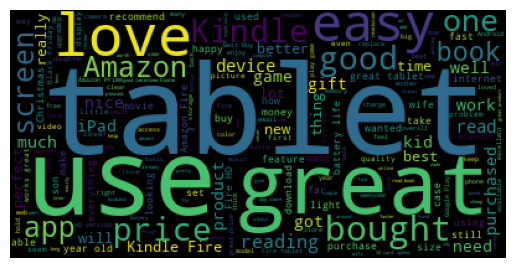

In [62]:
wordcl = WordCloud(background_color='black').generate(rxt)
plt.imshow(wordcl)
plt.axis('off')

In [77]:
import spacy
from spacy import displacy



In [85]:
nlp = spacy.load("en_core_web_sm")

In [86]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [88]:
doc = nlp(rxt)

In [89]:
doc.ents

(Skype,
 8 two weeks,
 SHINES,
 1280/800,
 900,
 INSANELY,
 only 7.7mm,
 Amazon,
 64gig,
 hundreds of dollars,
 8 inch,
 one,
 a few years ago,
 Christmas,
 non-Kindle,
 first,
 youAnd,
 5,
 Love,
 8,
 9,
 Christmas,
 Amazon,
 Kindle,
 LOVE,
 Kindle Fire,
 Value,
 3,
 Bought,
 87 year old,
 iPad,
 second,
 Tablet,
 first,
 first,
 This 8 inch,
 7 inch,
 under $100,
 Amazon,
 Amazon,
 Kindle,
 Amazon,
 My 4 year old,
 Grandson,
 Kindle,
 one,
 Christmas,
 iPad,
 the Kindle of another,
 WIFI,
 Kindle,
 Tab,
 our 5 year old,
 Youtube,
 Twitch,
 AWFUL,
 65 bucks,
 Amazon Kindle Fire,
 Amazon,
 Netflix,
 DIRECTTV app & stream videos,
 second,
 Kindle,
 first,
 Every few days,
 days,
 720p,
 Amazon App,
 Android,
 Google Play,
 500,
 10,
 Kindle Fires,
 daily,
 one,
 FreeTime,
 one year,
 Amazon,
 Amazon Fire,
 Amazon Fire,
 more than 4 years,
 4,
 apps parental controls,
 2,
 6 and 8 year old,
 Black Friday,
 59,
 Amazon,
 Freetime,
 Netflix,
 Christmas,
 a Kindle Fire,
 Kindle,
 Christmas,

In [92]:
for i in doc.ents:
    print(i," ",i.label_)

Skype   ORG
8 two weeks   DATE
SHINES   ORG
1280/800   CARDINAL
900   MONEY
INSANELY   ORG
only 7.7mm   QUANTITY
Amazon   ORG
64gig   CARDINAL
hundreds of dollars   MONEY
8 inch   QUANTITY
one   CARDINAL
a few years ago   DATE
Christmas   DATE
non-Kindle   NORP
first   ORDINAL
youAnd   PERSON
5   CARDINAL
Love   WORK_OF_ART
8   CARDINAL
9   CARDINAL
Christmas   DATE
Amazon   ORG
Kindle   GPE
LOVE   ORG
Kindle Fire   LOC
Value   ORG
3   CARDINAL
Bought   PERSON
87 year old   DATE
iPad   ORG
second   ORDINAL
Tablet   PERSON
first   ORDINAL
first   ORDINAL
This 8 inch   QUANTITY
7 inch   QUANTITY
under $100   MONEY
Amazon   ORG
Amazon   ORG
Kindle   NORP
Amazon   ORG
My 4 year old   DATE
Grandson   PERSON
Kindle   GPE
one   CARDINAL
Christmas   DATE
iPad   ORG
the Kindle of another   GPE
WIFI   ORG
Kindle   PERSON
Tab   PERSON
our 5 year old   DATE
Youtube   PERSON
Twitch   PERSON
AWFUL   ORG
65 bucks   MONEY
Amazon Kindle Fire   ORG
Amazon   ORG
Netflix   ORG
DIRECTTV app & stream videos

In [93]:
!pip install afinn


     ---------------------------------------- 52.6/52.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=6c94f9445a58fb9ab9cb5e194c885bd110a361b901b5b67851203b1394cf5a08
  Stored in directory: c:\users\91880\appdata\local\pip\cache\wheels\79\91\ee\8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [106]:
afinn= pd.read_csv('afinn.csv')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [108]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences

['This product so far has not disappointed.',
 'My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person.',
 'Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI.',
 'He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.',
 'I bought this fo

In [109]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,This product so far has not disappointed.
1,My children love to use it and I like the abil...
2,great for beginner or experienced person.
3,Bought as a gift and she loves it Inexpensive ...
4,"He was thrilled with it, learn how to Skype on..."
...,...
7485,This is my second Fire.
7486,Wanted a larger size to make eBooks easier to ...
7487,Very pleased with the size and clarity of this...
7488,Easy to take along in a tote.


In [111]:
afinn_score = afinn.set_index('word')['value'].to_dict()

In [112]:
afinn_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [125]:
def cal_sentiment(text: str=None):
    sent_score = 0
    if text:
        sentences = nlp(text)
        for word in sentences:
            sent_score+=afinn_score.get(word.lemma_,0)
            return sent_score

In [126]:
cal_sentiment(text = 'satisfy')

0

In [127]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(cal_sentiment)
sent_df

,sentence,sentiment_value
0,This product so far has not disappointed.,0
1,My children love to use it and I like the abil...,0
2,great for beginner or experienced person.,3
3,Bought as a gift and she loves it Inexpensive ...,0
4,"He was thrilled with it, learn how to Skype on...",0
...,...,...
7485,This is my second Fire.,0
7486,Wanted a larger size to make eBooks easier to ...,1
7487,Very pleased with the size and clarity of this...,0
7488,Easy to take along in a tote.,1


In [128]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
3487,horrible...just like the other 7 i have owned ...,-3
3151,Confusing screens but practical and inexpensive.,-2
3974,Disappointed that I cannot use Chromecast from...,-2
6962,Lack of individual number buttons is frustrati...,-2
2510,Tired of my bulky tablet.,-2
...,...,...
282,Awesome!!,4
3413,Awesome purchase!,4
1180,Wonderful display.,4
3921,"awesome, great value, good quality product, I ...",4


In [129]:
sent_df.sort_values(by='sentiment_value').sample(20)

,sentence,sentiment_value
6634,Can fit anywhere.,0
4842,This was the perfect tablet for my wife for Ch...,0
5793,"Nice size screen, clear and clean picture with...",3
4048,Would and have recommended this product.,0
4167,I was misled.,0
5853,I also have another tablet but use the kindle ...,0
6718,The battery life is so long I have only charge...,0
4123,My husband loves it too.,0
527,The Amazon fire is simply amazing I would not ...,0
6693,The power button and charge port are located i...,0


In [130]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    7490.000000
mean        0.311883
std         0.909105
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: sentiment_value, dtype: float64

In [132]:
# Sentiment score of the whole reviews which have negative scores
sent_df[sent_df['sentiment_value']<=-1]

,sentence,sentiment_value
235,NO PROBLEMS.,-1
279,Forget the IPod touch.,-1
449,No issues at this point.,-1
475,No complaints so far!,-1
741,No problems with the second one.,-1
...,...,...
6683,"No dark spots, no bright spots...just a comple...",-1
6775,"No matter what I’m doing, the Kindle Oasis rem...",-1
6926,Lack of individual number buttons is frustrati...,-2
6962,Lack of individual number buttons is frustrati...,-2


In [133]:
sent_df.loc[10]["sentence"]

'I set it up with her as the user, entered her age and name and now Amazon makes sure that she only accesses sites and content that are appropriate to her age.'

C:\Users\91880\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

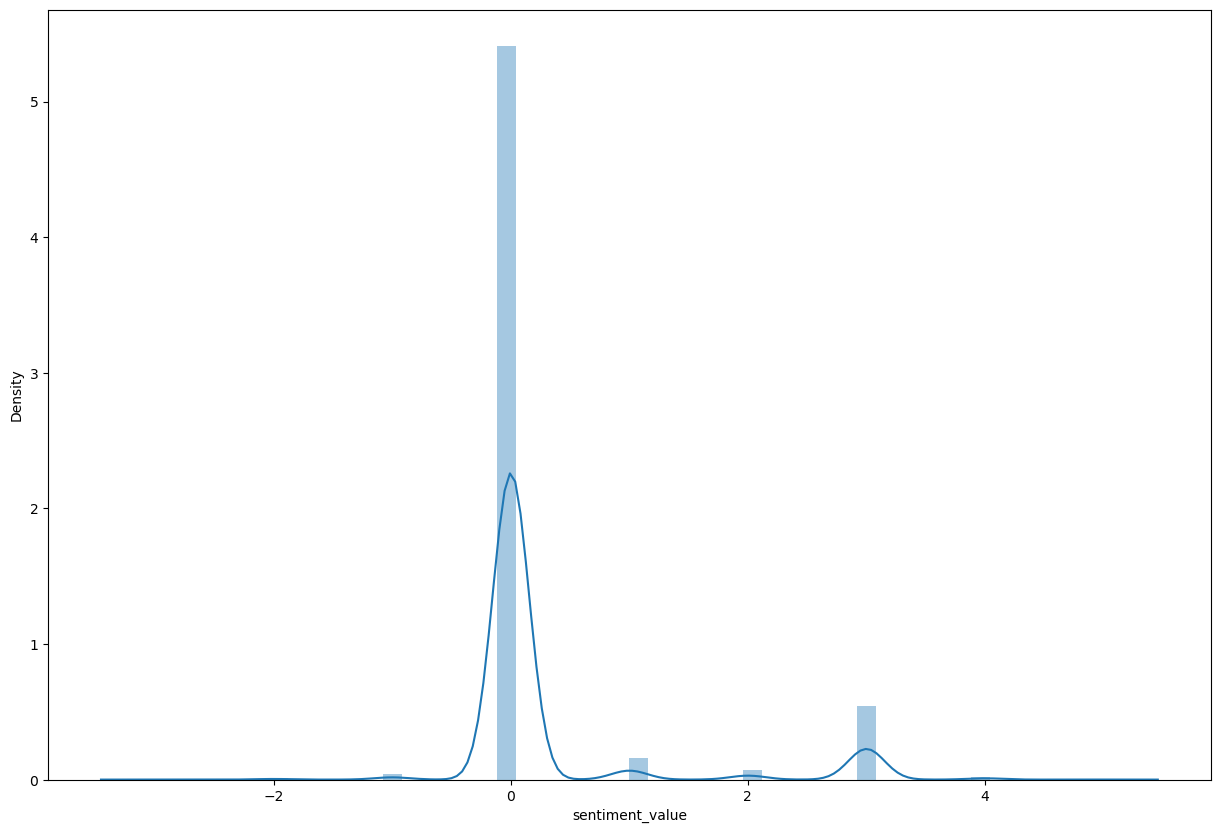

In [134]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])